In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('calories.csv')
df.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7,123.0
6,19602372,female,33,158.0,56.0,22.0,95.0,40.5,112.0
7,11117088,male,41,175.0,85.0,25.0,100.0,40.7,143.0
8,12132339,male,60,186.0,94.0,21.0,97.0,40.4,134.0
9,17964668,female,26,146.0,51.0,16.0,90.0,40.2,72.0


In [3]:
print(f"shape(rows,columns):{df.shape}")

shape(rows,columns):(15000, 9)


In [4]:
print("information about datacolumns :")
df.info()

information about datacolumns :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [5]:
#min,max,IQR ,mean,std for each numerical column in the dataset
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


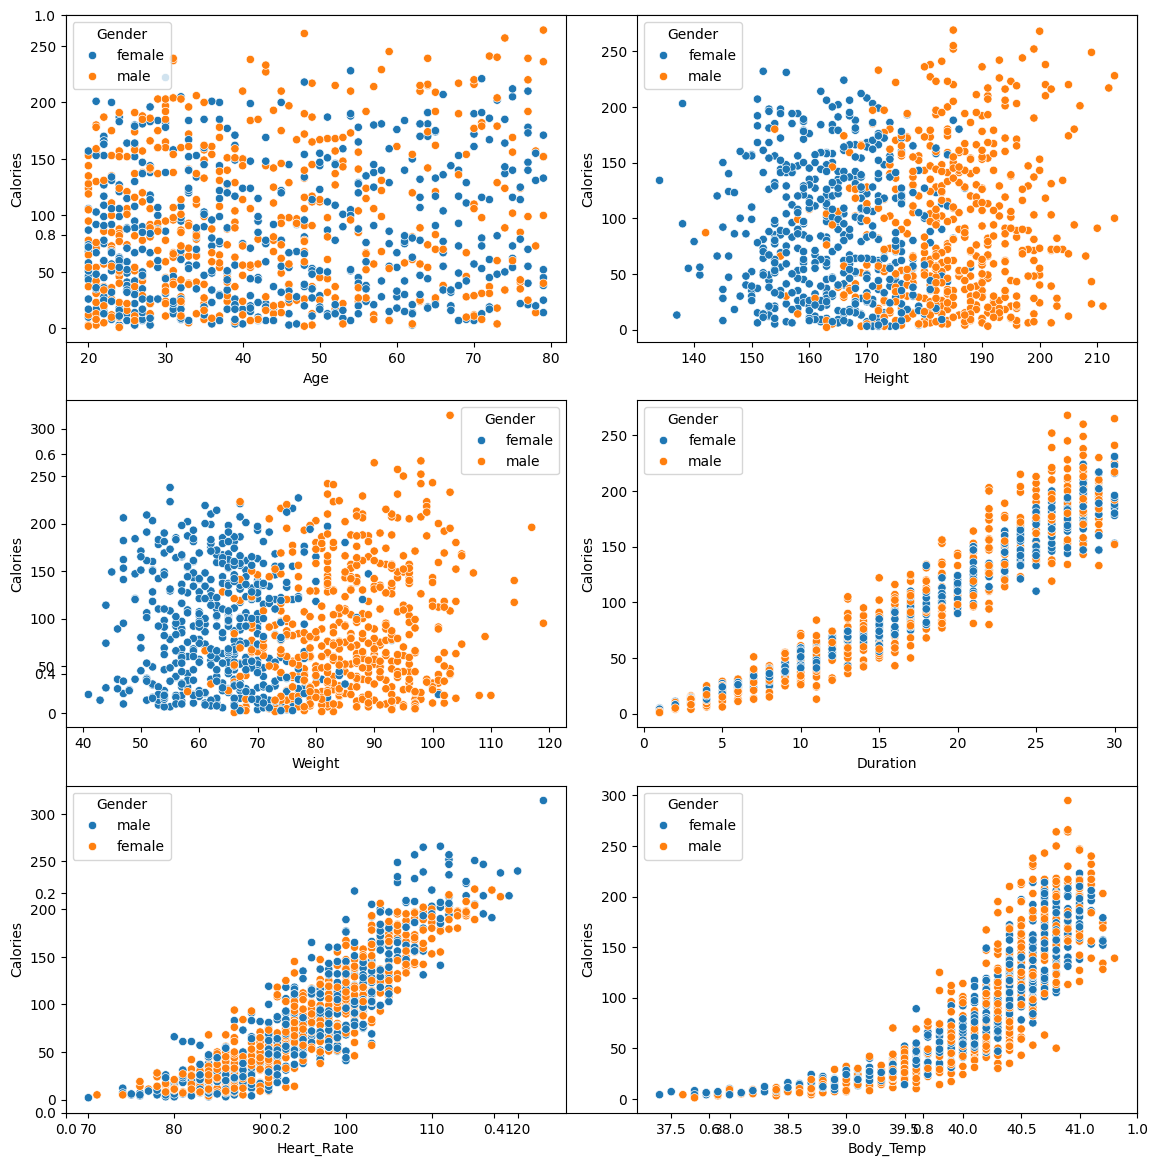

In [7]:
features = ['Age', 'Height', 'Weight', 'Duration','Heart_Rate','Body_Temp']

plt.subplots(figsize=(12, 12))
for i, col in enumerate(features):
    plt.subplot(3, 2, i + 1)
    data = df.sample(1000)
    sb.scatterplot(x=col, y='Calories',hue="Gender", data=data)
plt.tight_layout()
plt.show()

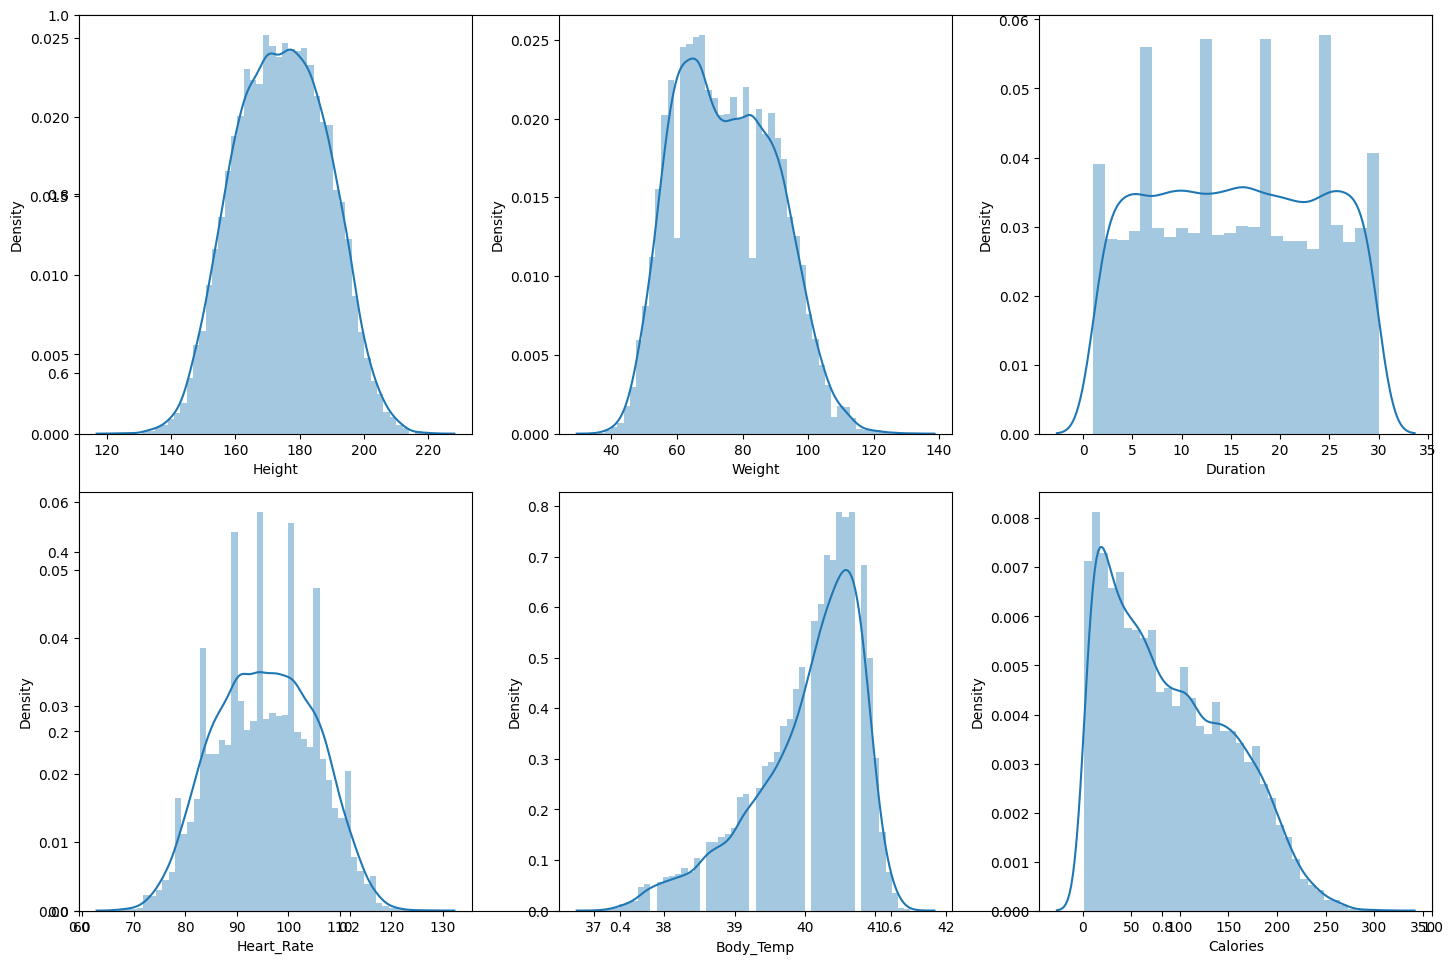

In [8]:
features = df.select_dtypes(include='float').columns

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()

In [9]:
df.replace({'male': 0, 'female': 1},
           inplace=True)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


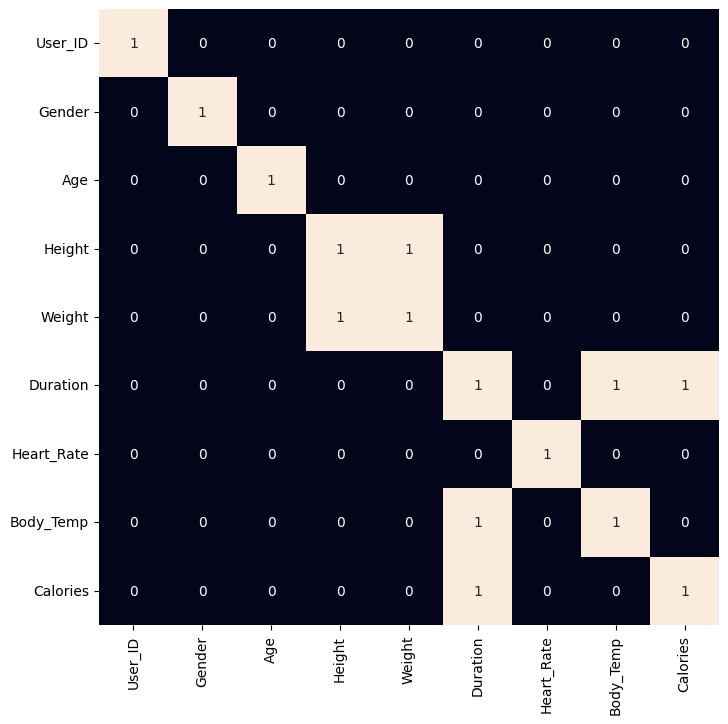

In [10]:
#heatmap 
plt.figure(figsize=(8, 8))
sb.heatmap(df.corr() > 0.9,
           annot=True,
           cbar=False)
plt.show()

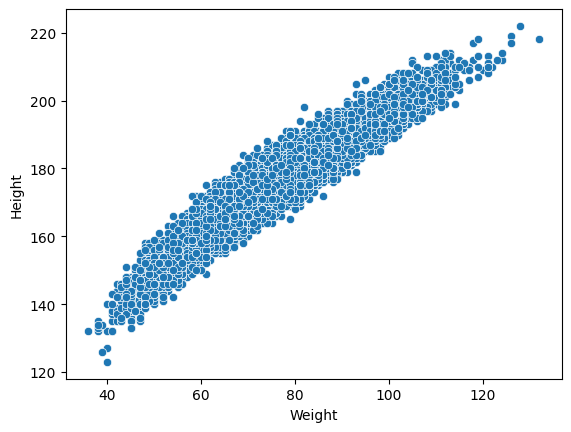

In [11]:
#weight and height are linearly correlated
sb.scatterplot(x="Weight",y="Height",data=df)
plt.show()

In [12]:
#due to multicollineraity , "Duration" feature should be removed as its affects the performance of linearmodels
#height and weight are perfectly correlated so we don't need both  so remove either
features_to_remove= ['Weight', 'Duration','User_ID']
df.drop(features_to_remove, axis=1, inplace=True)

In [13]:
X_data = df.drop(['Calories'], axis=1)
Y_data= df['Calories'].values

X_train, X_val,\
    Y_train, Y_val = train_test_split(X_data,Y_data,
                                      test_size=0.1,
                                      random_state=22)
X_train.shape, X_val.shape

((13500, 5), (1500, 5))

In [14]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [15]:

models = [LinearRegression(), XGBRegressor(), RandomForestRegressor()]

for i in range(len(models)):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')

    training_predictions = models[i].predict(X_train)
    print('Training Error : ',metrics.mean_absolute_error(Y_train, training_predictions))

    validation_predictions = models[i].predict(X_val)
    print('Validation Error : ', metrics.mean_absolute_error(Y_val, validation_predictions))
    print()

LinearRegression() : 
Training Error :  17.893463692619434
Validation Error :  18.007896272831253

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...) : 
Training Error :  7.89463304294701
Validation Error :  10.12050432946533

RandomForestRegressor() : 
Training Error :  3.98994805643739
Validation E

In [28]:
RFR=RandomForestRegressor()
RFR.fit(X_train,Y_train)

RandomForestRegressor()

In [16]:
import pickle

In [30]:
with open("model.pkl","wb") as f:
    pickle.dump(RFR,f)

In [22]:
print(X_data)

       Gender  Age  Height  Heart_Rate  Body_Temp
0           0   68   190.0       105.0       40.8
1           1   20   166.0        94.0       40.3
2           0   69   179.0        88.0       38.7
3           1   34   179.0       100.0       40.5
4           1   27   154.0        81.0       39.8
...       ...  ...     ...         ...        ...
14995       1   20   193.0        92.0       40.4
14996       1   27   165.0        85.0       39.2
14997       1   43   159.0        90.0       40.1
14998       0   78   193.0        84.0       38.3
14999       0   63   173.0        92.0       40.5

[15000 rows x 5 columns]


In [31]:
import pickle 
with open("model.pkl","rb") as f:
    model=pickle.load(f)

In [32]:
model.predict([[0,52,190,105,40.8]])

array([233.96])